# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# DATA PREPROCESSING

In [2]:
data = pd.read_csv('cardio_train (1).csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
#Changing the name of the column
data.rename(columns={'ap_hi': 'sys_p'}, inplace=True)
data.rename(columns={'ap_lo': 'dia_p'}, inplace=True)

In [4]:
data = data.drop(['id'], axis=1)
data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
data = data.drop_duplicates()
data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
data['age'] = round(data['age']/365)
data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
data = data[data['age'] <= 50]
data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0
12,41.0,2,165,60.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69981,48.0,2,182,110.0,130,90,2,2,0,0,1,1
69984,49.0,2,168,80.0,120,80,1,1,0,0,1,1
69985,50.0,1,156,102.0,130,80,1,1,0,1,0,1
69986,50.0,2,180,78.0,120,80,1,1,0,0,1,0


In [8]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
sys_p          0
dia_p          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
data["bmi"] = data["weight"] / (data["height"]/100)**2
data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0,28.440955
12,41.0,2,165,60.0,120,80,1,1,0,0,0,0,22.038567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,48.0,2,182,110.0,130,90,2,2,0,0,1,1,33.208550
69984,49.0,2,168,80.0,120,80,1,1,0,0,1,1,28.344671
69985,50.0,1,156,102.0,130,80,1,1,0,1,0,1,41.913215
69986,50.0,2,180,78.0,120,80,1,1,0,0,1,0,24.074074


In [10]:
data['body_fat'] = np.where(data['gender'] == 1, ((1.20 * data['bmi']) + (0.23 * data['age']) - 5.4), 
                            ((1.20 * data['bmi']) + (0.23 * data['age']) - 16.2))
data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio,bmi,body_fat
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,21.660544
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,29.292575
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,33.253412
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0,28.440955,39.769146
12,41.0,2,165,60.0,120,80,1,1,0,0,0,0,22.038567,19.676281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,48.0,2,182,110.0,130,90,2,2,0,0,1,1,33.208550,34.690260
69984,49.0,2,168,80.0,120,80,1,1,0,0,1,1,28.344671,29.083605
69985,50.0,1,156,102.0,130,80,1,1,0,1,0,1,41.913215,56.395858
69986,50.0,2,180,78.0,120,80,1,1,0,0,1,0,24.074074,24.188889


In [11]:
out_filter = ((data["sys_p"]>200) | (data["dia_p"]>180))
data = data[~out_filter]

out_filter2 = ((data["sys_p"] < 0) | (data["dia_p"] < 0))
data = data[~out_filter2]

data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio,bmi,body_fat
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,21.660544
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,29.292575
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,33.253412
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0,28.440955,39.769146
12,41.0,2,165,60.0,120,80,1,1,0,0,0,0,22.038567,19.676281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,48.0,2,182,110.0,130,90,2,2,0,0,1,1,33.208550,34.690260
69984,49.0,2,168,80.0,120,80,1,1,0,0,1,1,28.344671,29.083605
69985,50.0,1,156,102.0,130,80,1,1,0,1,0,1,41.913215,56.395858
69986,50.0,2,180,78.0,120,80,1,1,0,0,1,0,24.074074,24.188889


In [12]:
data.head()

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,cardio,bmi,body_fat
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,21.660544
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,29.292575
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,33.253412
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0,28.440955,39.769146
12,41.0,2,165,60.0,120,80,1,1,0,0,0,0,22.038567,19.676281


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23712 entries, 0 to 69990
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          23712 non-null  float64
 1   gender       23712 non-null  int64  
 2   height       23712 non-null  int64  
 3   weight       23712 non-null  float64
 4   sys_p        23712 non-null  int64  
 5   dia_p        23712 non-null  int64  
 6   cholesterol  23712 non-null  int64  
 7   gluc         23712 non-null  int64  
 8   smoke        23712 non-null  int64  
 9   alco         23712 non-null  int64  
 10  active       23712 non-null  int64  
 11  cardio       23712 non-null  int64  
 12  bmi          23712 non-null  float64
 13  body_fat     23712 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 2.7 MB


In [14]:
swap_list = ["age","gender","height","weight" ,"sys_p", "dia_p" , "cholesterol", "gluc", "smoke", "alco", 
             "active", "bmi", "body_fat", "cardio"]

# Swapping the columns
data = data.reindex(columns=swap_list)
data

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,bmi,body_fat,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,21.967120,21.660544,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1,28.710479,29.292575,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,23.011177,33.253412,0
8,48.0,1,158,71.0,110,70,1,1,0,0,1,28.440955,39.769146,0
12,41.0,2,165,60.0,120,80,1,1,0,0,0,22.038567,19.676281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,48.0,2,182,110.0,130,90,2,2,0,0,1,33.208550,34.690260,1
69984,49.0,2,168,80.0,120,80,1,1,0,0,1,28.344671,29.083605,1
69985,50.0,1,156,102.0,130,80,1,1,0,1,0,41.913215,56.395858,1
69986,50.0,2,180,78.0,120,80,1,1,0,0,1,24.074074,24.188889,0


# EXPLORATORY ANALYSIS

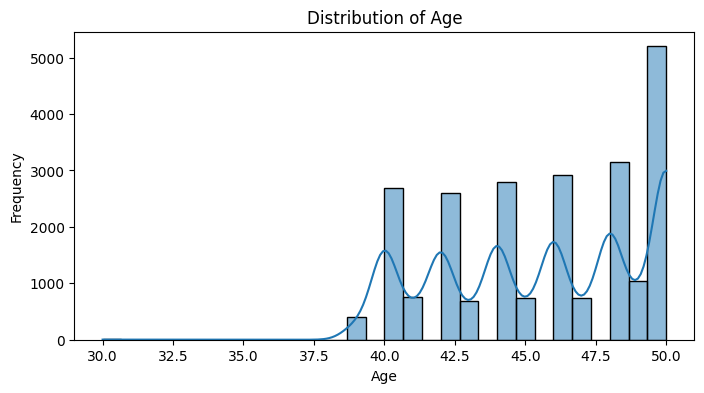

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

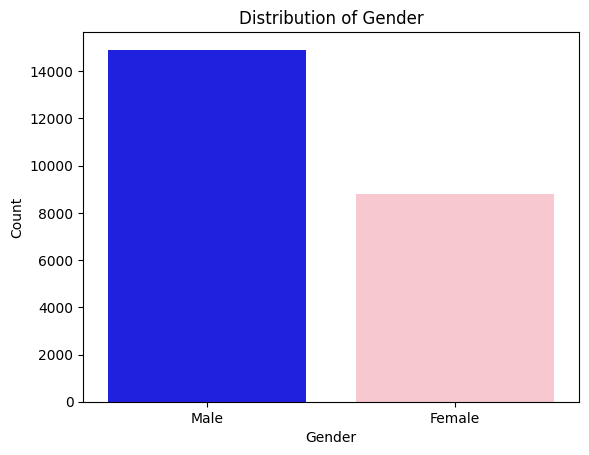

In [16]:
sns.countplot(x='gender', data=data, palette={'2': 'pink', '1': 'blue'})
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([1, 0], ['Female', 'Male'])  
plt.show()


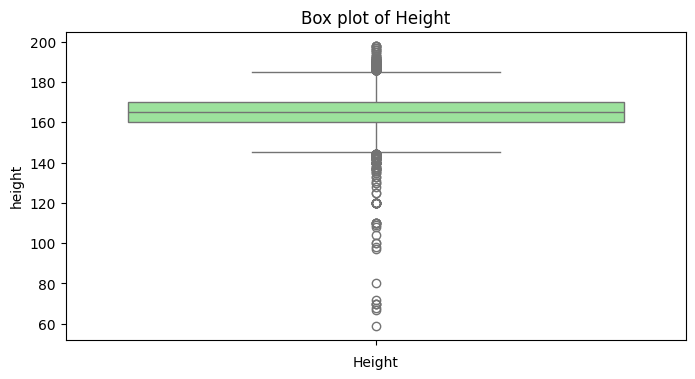

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['height'], color='lightgreen')
plt.title('Box plot of Height')
plt.xlabel('Height')
plt.show()

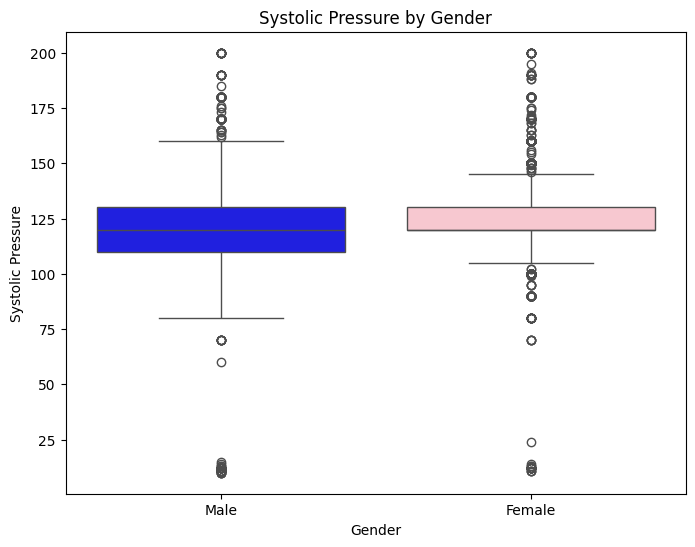

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='sys_p', data=data, palette={'2': 'pink', '1': 'blue'})
plt.title('Systolic Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Systolic Pressure')
plt.xticks([1, 0], ['Female', 'Male'])
plt.show()

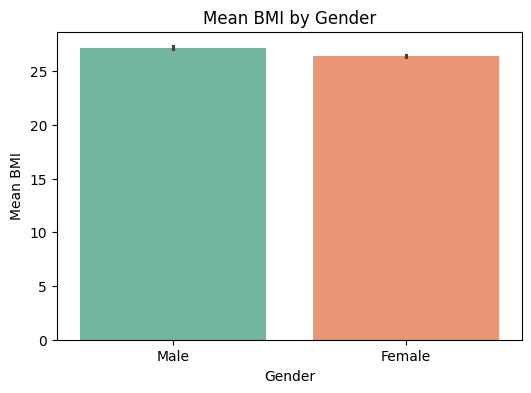

In [40]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='bmi', data=data, palette='Set2', estimator=np.mean)
plt.title('Mean BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean BMI')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


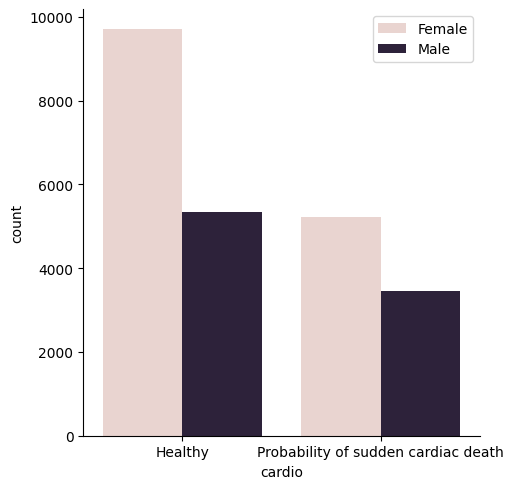

In [41]:
sns.catplot(x='cardio',kind='count',data=data, hue='gender', legend=False).set_xticklabels(
    ["Healthy", "Probability of sudden cardiac death" ])
plt.legend(labels=['Female','Male'])
plt.show()

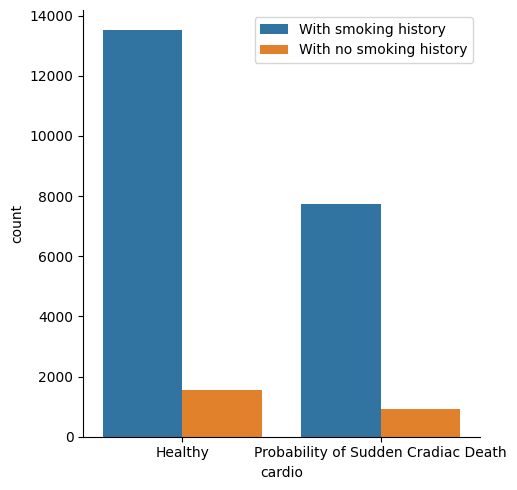

In [42]:
sns.catplot(x='cardio',kind='count',data=data, hue='smoke', legend=False).set_xticklabels(
    ["Healthy", "Probability of Sudden Cradiac Death" ])
plt.legend(labels=['With smoking history','With no smoking history'])
plt.show()

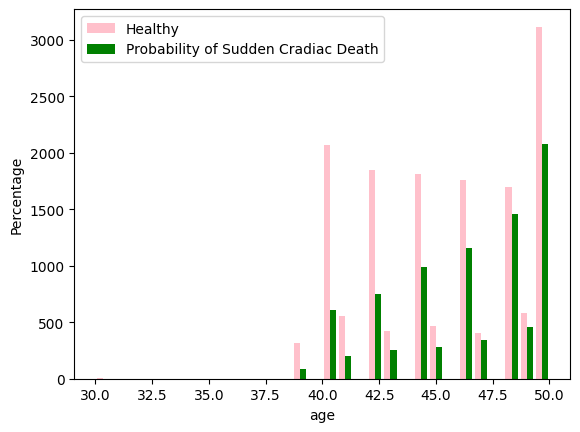

In [43]:
plt.hist([data[data.cardio==0].age,data[data.cardio==1].age],bins=30,alpha=1,label=
         ["Healthy","Probability of Sudden Cradiac Death"],color = ['pink','green'], lw=0);
plt.xlabel('age')
plt.ylabel('Percentage')
plt.legend()
plt.show()

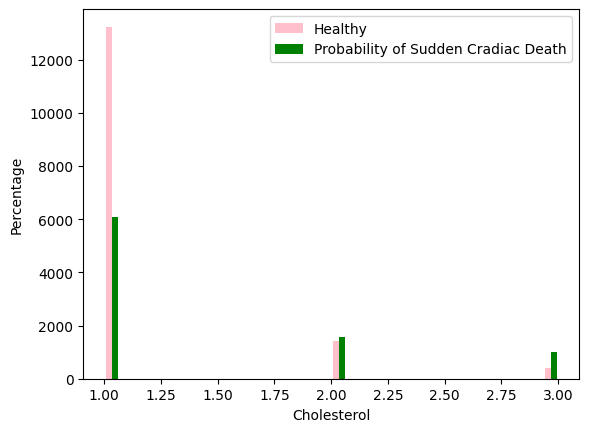

In [44]:
plt.hist([data[data.cardio==0].cholesterol,data[data.cardio==1].cholesterol],bins=30,alpha=1,label=
         ["Healthy","Probability of Sudden Cradiac Death"],color = ['pink','green'], lw=0);
plt.xlabel('Cholesterol')
plt.ylabel('Percentage')
plt.legend()
plt.show()

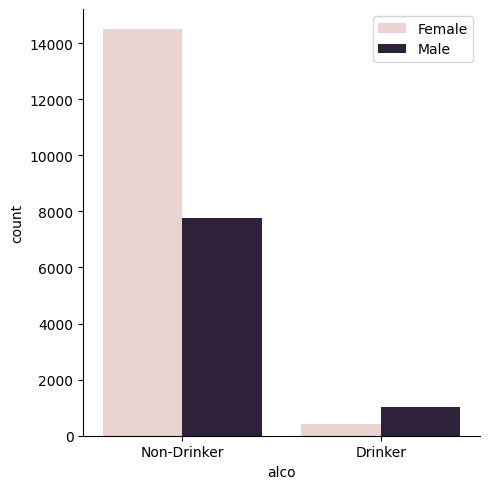

In [24]:
sns.catplot(x='alco',kind='count', data=data, hue='gender', legend=False).set_xticklabels(["Non-Drinker", "Drinker" ])
plt.legend(labels=['Female','Male'])
plt.show()

<Axes: >

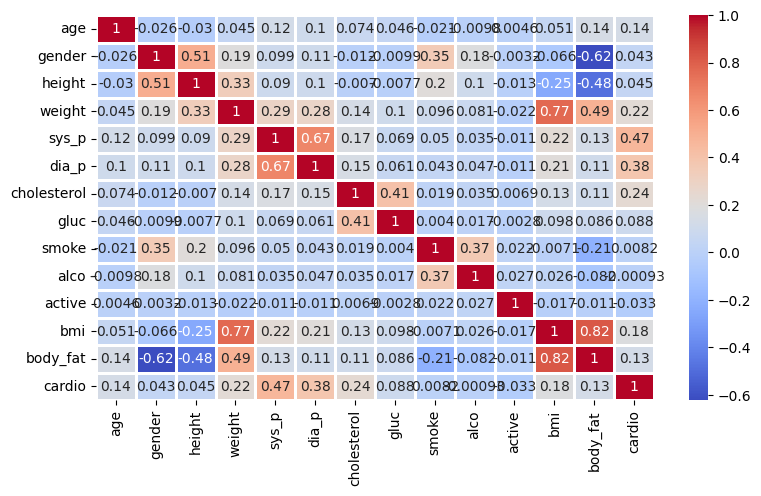

In [45]:
cm=data.corr()
plt.figure(figsize=(9,5))
sns.heatmap(cm,annot=True,linewidths=2 ,cmap='coolwarm')

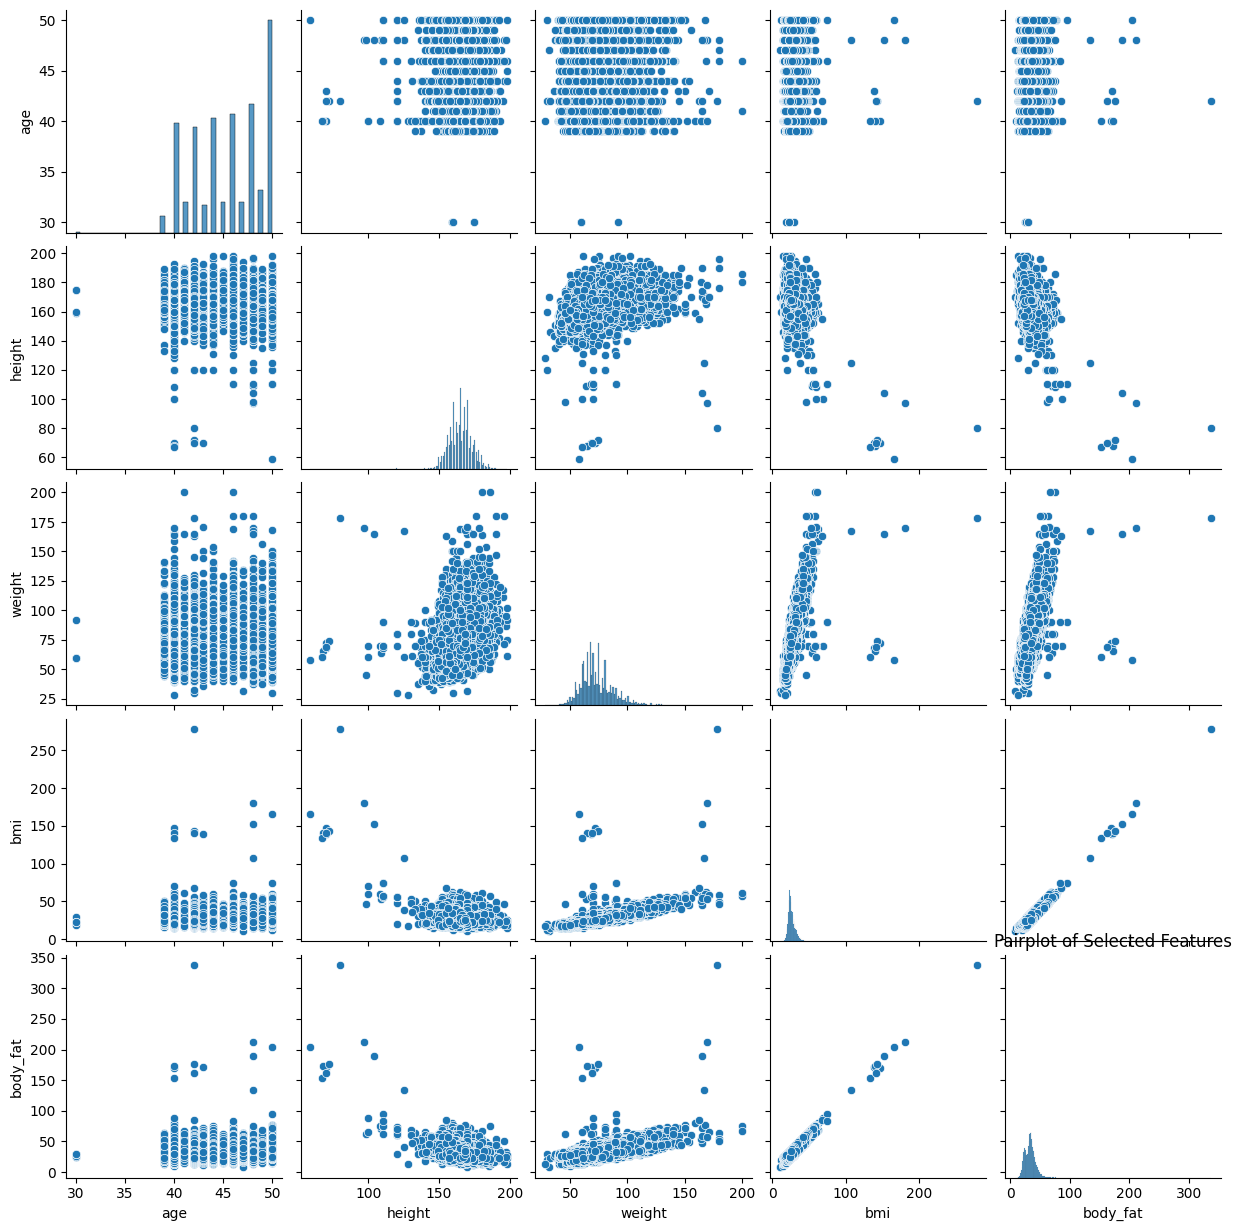

In [26]:
sns.pairplot(data[['age', 'height', 'weight', 'bmi', 'body_fat']], palette='coolwarm')
plt.title('Pairplot of Selected Features')
plt.show()

# MODEL TRAINING 

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
# target_name = "cardio"
y = data['cardio']
X = data.drop('cardio', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [30]:
X_train.head(3)

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,bmi,body_fat
12684,48.0,1,167,67.0,120,80,1,2,0,0,1,24.023809,34.468570
58117,43.0,2,176,77.0,120,80,3,3,0,0,1,24.857955,23.519545
12950,45.0,2,171,109.0,120,80,1,1,0,0,0,37.276427,38.881712


In [31]:
X_test.head(3)

,age,gender,height,weight,sys_p,dia_p,cholesterol,gluc,smoke,alco,active,bmi,body_fat
68767,46.0,2,180,92.0,130,80,1,1,0,0,1,28.395062,28.454074
38760,40.0,1,159,68.0,90,60,2,3,0,0,1,26.897670,36.077204
40256,48.0,1,164,64.0,140,90,2,1,0,0,1,23.795360,34.194432


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 12684 to 41201
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          16598 non-null  float64
 1   gender       16598 non-null  int64  
 2   height       16598 non-null  int64  
 3   weight       16598 non-null  float64
 4   sys_p        16598 non-null  int64  
 5   dia_p        16598 non-null  int64  
 6   cholesterol  16598 non-null  int64  
 7   gluc         16598 non-null  int64  
 8   smoke        16598 non-null  int64  
 9   alco         16598 non-null  int64  
 10  active       16598 non-null  int64  
 11  bmi          16598 non-null  float64
 12  body_fat     16598 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 1.8 MB


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7114 entries, 68767 to 65762
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7114 non-null   float64
 1   gender       7114 non-null   int64  
 2   height       7114 non-null   int64  
 3   weight       7114 non-null   float64
 4   sys_p        7114 non-null   int64  
 5   dia_p        7114 non-null   int64  
 6   cholesterol  7114 non-null   int64  
 7   gluc         7114 non-null   int64  
 8   smoke        7114 non-null   int64  
 9   alco         7114 non-null   int64  
 10  active       7114 non-null   int64  
 11  bmi          7114 non-null   float64
 12  body_fat     7114 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 778.1 KB


# MODEL 1: DECISION TREE 

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=50)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [35]:
print('Best Parameters:',grid_search_dt.best_params_,end='\n\n')
print('Accuracy of the model:',grid_search_dt.best_score_)
# print("Accuracy of the model:" , grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Accuracy of the model: 0.7850953633768625


In [36]:
dt_best = grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=50)

In [37]:
train_accuracy = accuracy_score(y_train, dt_best.predict(X_train))
print('Accuracy of train data: ', train_accuracy)
y_pred = dt_best.predict(X_test)

dt_test_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of test data: ', dt_test_accuracy)

Accuracy of train data:  0.789914447523798
Accuracy of test data:  0.7936463311779589


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Accuracy of the model: 0.7850953633768625

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4536
           1       0.80      0.58      0.67      2578

    accuracy                           0.79      7114
   macro avg       0.79      0.75      0.76      7114
weighted avg       0.79      0.79      0.78      7114


Confusion Matrix:
[[4157  379]
 [1089 1489]]

ROC Curve:


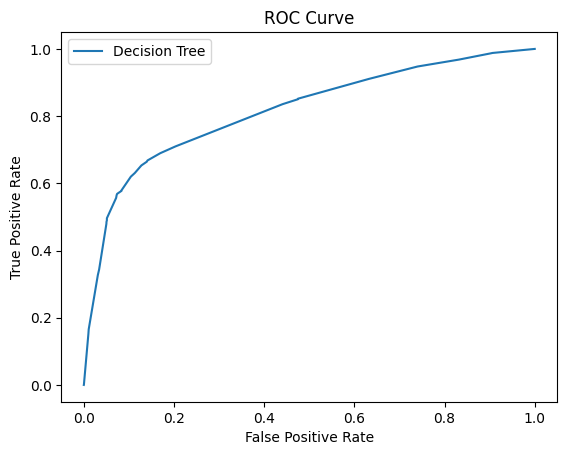

Area under ROC curve: 0.8156511548676018


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming grid_search_dt is your GridSearchCV object

# Best Parameters
print('Best Parameters:', grid_search_dt.best_params_, end='\n\n')

# Accuracy
print('Accuracy of the model:', grid_search_dt.best_score_)

# Precision, Recall, F1-Score
print('\nClassification Report:')
y_true = grid_search_dt.predict(X_test)  # Assuming X_test is your test data
print(classification_report(y_test, y_true))

# Confusion Matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_true))

# ROC Curve
print('\nROC Curve:')
y_probs = grid_search_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, linestyle='-', label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Area under ROC curve
auc_dt = roc_auc_score(y_test, y_probs)
print('Area under ROC curve:', auc_dt)


In [47]:
dt_best.feature_importances_

array([0.03006509, 0.        , 0.00378561, 0.01158115, 0.83987625,
       0.00694578, 0.08087518, 0.00979474, 0.        , 0.        ,
       0.        , 0.01316624, 0.00390996])

        Varname       Imp
4         sys_p  0.839876
6   cholesterol  0.080875
0           age  0.030065
11          bmi  0.013166
3        weight  0.011581
7          gluc  0.009795
5         dia_p  0.006946
12     body_fat  0.003910
2        height  0.003786
1        gender  0.000000
8         smoke  0.000000
9          alco  0.000000
10       active  0.000000


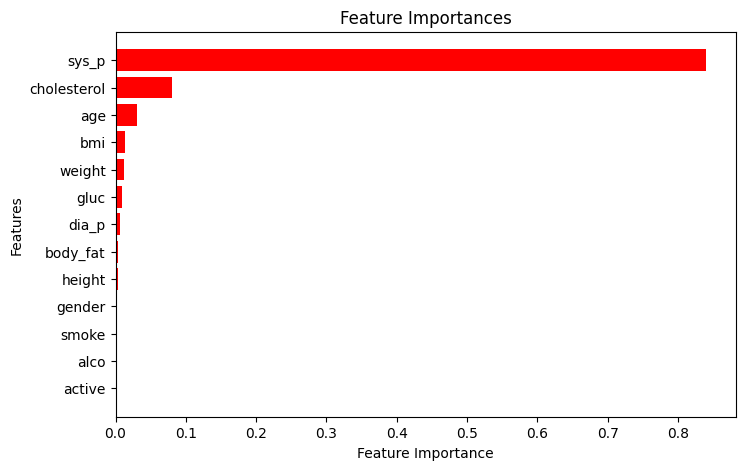

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dt_best is your trained decision tree model
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

sorted_imp_df = imp_df.sort_values(by="Imp", ascending=False)
print(sorted_imp_df)
plt.figure(figsize=(8, 5))
plt.barh(sorted_imp_df["Varname"], sorted_imp_df["Imp"], color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

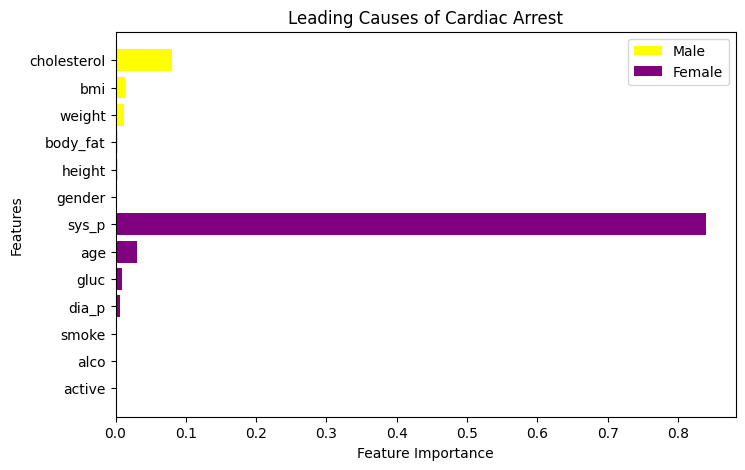

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dt_best is your trained decision tree model
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

# Reset the index of X_train to avoid indexing errors
X_train_reset_index = X_train.reset_index(drop=True)

# Filter the DataFrame to include only males (gender = 2)
imp_df_male = imp_df[X_train_reset_index['gender'] == 2]

# Filter the DataFrame to include only females (gender = 1)
imp_df_female = imp_df[X_train_reset_index['gender'] == 1]

sorted_imp_df_male = imp_df_male.sort_values(by="Imp", ascending=False)
sorted_imp_df_female = imp_df_female.sort_values(by="Imp", ascending=False)

plt.figure(figsize=(8, 5))

# Plot male bar in yellow color
plt.barh(sorted_imp_df_male["Varname"], sorted_imp_df_male["Imp"], color='yellow', label='Male')

# Plot female bar in purple color
plt.barh(sorted_imp_df_female["Varname"], sorted_imp_df_female["Imp"], color='purple', label='Female')

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Leading Causes of Cardiac Arrest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.legend()  # Show legend for gender colors
plt.show()

# MODEL 2: LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
standared_scaler = StandardScaler()
X = standared_scaler.fit_transform(X)
print(X)

[[ 1.25614142  1.3018647   0.35184843 ...  0.48549764 -0.83081069
  -1.27273366]
 [ 0.69098682  1.3018647   0.47435809 ...  0.48549764  0.30597645
  -0.44137426]
 [ 0.69098682 -0.76812898 -1.11826743 ... -2.05974225 -0.65480491
  -0.0099191 ]
 ...
 [ 1.25614142 -0.76812898 -1.11826743 ... -2.05974225  2.53167729
   2.5109944 ]
 [ 1.25614142  1.3018647   1.8219643  ...  0.48549764 -0.47562301
  -0.99732032]
 [-1.28705427 -0.76812898  0.35184843 ...  0.48549764 -0.23352199
   0.14136686]]


In [55]:
logistic_Model = LogisticRegression(random_state=50)
logistic_Model.fit(X_train, y_train)
y_predicted = logistic_Model.predict(X_test)
print(y_predicted)

[0 0 1 ... 0 0 1]


In [56]:
parameter_grid_logistic_regression = {
    # 'max_iter': [20, 50, 100, 200, 500, 1000],                      # Number of iterations
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   # Algorithm to use for optimization
    # 'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']                                # Troubleshoot unbalanced data sampling
}

In [57]:
logistic_Model_grid = GridSearchCV(estimator=logistic_Model, param_grid=parameter_grid_logistic_regression, verbose=0,
                    cv=4, n_jobs=-1)

logistic_Model_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=50), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

Best hyperparameters: {'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy of best model: 0.7925217880236154

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4536
           1       0.80      0.57      0.67      2578

    accuracy                           0.79      7114
   macro avg       0.79      0.75      0.76      7114
weighted avg       0.79      0.79      0.78      7114


Confusion Matrix:
[[4158  378]
 [1098 1480]]

ROC Curve:


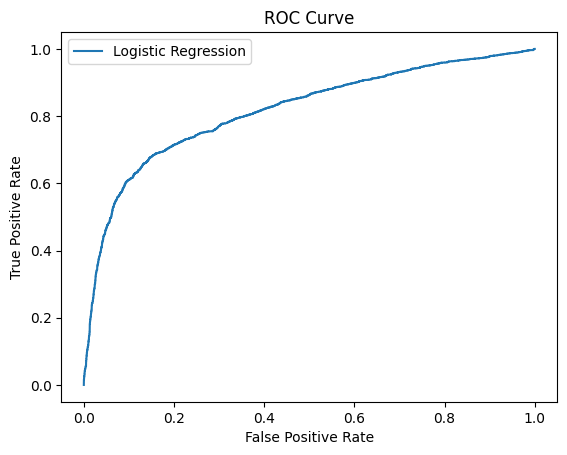

Area under ROC curve: 0.8165711289256673


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming logistic_Model_grid is your GridSearchCV object

# Best Parameters
print("Best hyperparameters:", logistic_Model_grid.best_params_)

# Evaluate the model with best hyperparameters
best_model = logistic_Model_grid.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy of best model:", accuracy)

# Precision, Recall, F1-Score
print('\nClassification Report:')
y_true = best_model.predict(X_test)  # Assuming X_test is your test data
print(classification_report(y_test, y_true))

# Confusion Matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_true))

# ROC Curve
print('\nROC Curve:')
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, linestyle='-', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Area under ROC curve
auc_lr = roc_auc_score(y_test, y_probs)
print('Area under ROC curve:', auc_lr)


In [60]:
y_train_predicted = best_model.predict(X_train)

# Train data accuracy
train_accuracy = accuracy_score(y_train, y_train_predicted)
print("Accuracy on train data:", train_accuracy)

# Predict on test data
y_test_predicted = best_model.predict(X_test)

# Test data accuracy
log_test_accuracy = accuracy_score(y_test, y_test_predicted)
print("Accuracy on test data:", log_test_accuracy)

Accuracy on train data: 0.7826846608025063
Accuracy on test data: 0.7925217880236154


In [61]:
coefficients = best_model.coef_[0]

# Get absolute values of coefficients
absolute_coefficients = abs(coefficients)
absolute_coefficients

array([0.05314381, 0.02840928, 0.00646767, 0.017314  , 0.06765979,
       0.02041048, 0.70695135, 0.10103093, 0.14394226, 0.35150363,
       0.16185277, 0.00693711, 0.00488695])

        Varname       Imp
6   cholesterol  0.706951
9          alco  0.351504
10       active  0.161853
8         smoke  0.143942
7          gluc  0.101031
4         sys_p  0.067660
0           age  0.053144
1        gender  0.028409
5         dia_p  0.020410
3        weight  0.017314
11          bmi  0.006937
2        height  0.006468
12     body_fat  0.004887


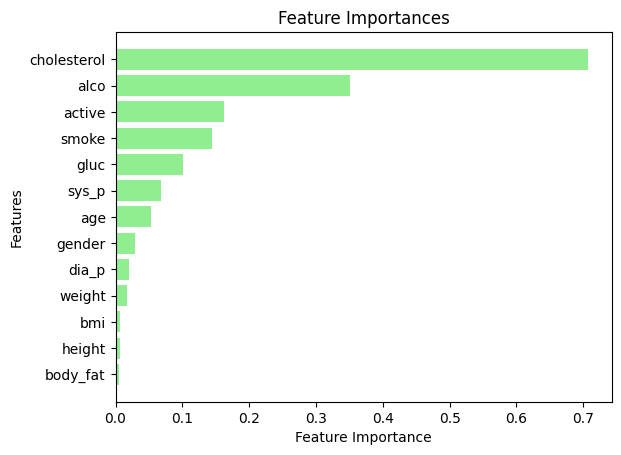

In [62]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": absolute_coefficients
})

sorted_imp_df = imp_df.sort_values(by="Imp", ascending=False)
print(sorted_imp_df)
plt.barh(sorted_imp_df["Varname"], sorted_imp_df["Imp"], color='lightgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

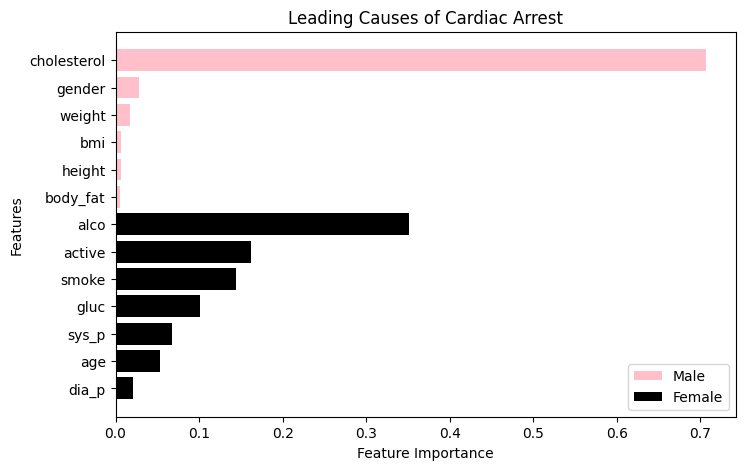

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dt_best is your trained decision tree model
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp":absolute_coefficients
})

# Reset the index of X_train to avoid indexing errors
X_train_reset_index = X_train.reset_index(drop=True)

# Filter the DataFrame to include only males (gender = 2)
imp_df_male = imp_df[X_train_reset_index['gender'] == 2]

# Filter the DataFrame to include only females (gender = 1)
imp_df_female = imp_df[X_train_reset_index['gender'] == 1]

sorted_imp_df_male = imp_df_male.sort_values(by="Imp", ascending=False)
sorted_imp_df_female = imp_df_female.sort_values(by="Imp", ascending=False)

plt.figure(figsize=(8, 5))

# Plot male bar in yellow color
plt.barh(sorted_imp_df_male["Varname"], sorted_imp_df_male["Imp"], color='pink', label='Male')

# Plot female bar in purple color
plt.barh(sorted_imp_df_female["Varname"], sorted_imp_df_female["Imp"], color='black', label='Female')

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Leading Causes of Cardiac Arrest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.legend()  # Show legend for gender colors
plt.show()

# MODEL 3: RANDOM FOREST

In [65]:

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=50, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=50)

In [66]:
rf = RandomForestClassifier(random_state=50, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [67]:
print('Best Parameters:',grid_search.best_params_,end='\n\n')
print('Accuracy of the model',grid_search.best_score_)
# print("Accuracy of the model:" , grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 100}

Accuracy of the model 0.7890716590149462


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 100}

Accuracy of the model: 0.7890716590149462

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4536
           1       0.80      0.61      0.69      2578

    accuracy                           0.80      7114
   macro avg       0.80      0.76      0.77      7114
weighted avg       0.80      0.80      0.79      7114


Confusion Matrix:
[[4141  395]
 [1016 1562]]

ROC Curve:


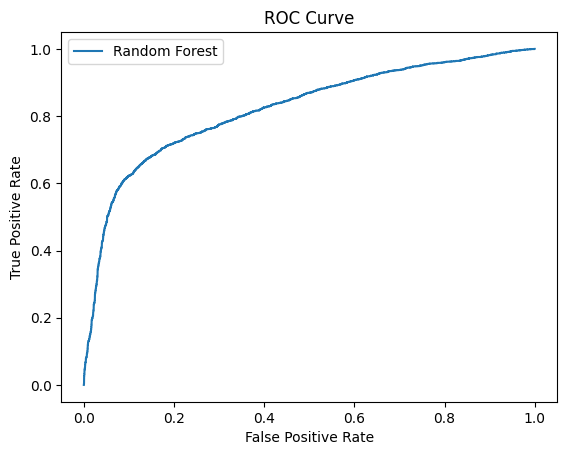

Area under ROC curve: 0.8214779992967218


In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming grid_search is your GridSearchCV object

# Best Parameters
print('Best Parameters:', grid_search.best_params_, end='\n\n')

# Accuracy
print('Accuracy of the model:', grid_search.best_score_)

# Precision, Recall, F1-Score
print('\nClassification Report:')
y_true = grid_search.predict(X_test)  # Assuming X_test is your test data
print(classification_report(y_test, y_true))

# Confusion Matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_true))

# ROC Curve
print('\nROC Curve:')
y_probs = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, linestyle='-', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Area under ROC curve
auc = roc_auc_score(y_test, y_probs)
print('Area under ROC curve:', auc)



In [69]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_jobs=-1,
                       random_state=50)

In [70]:
train_accuracy = accuracy_score(y_train, rf_best.predict(X_train))
print('Accuracy of train data: ', train_accuracy)
y_pred = rf_best.predict(X_test)

rf_test_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of test data: ', rf_test_accuracy)

Accuracy of train data:  0.8118448005783829
Accuracy of test data:  0.8016587011526567


In [71]:
rf_best.feature_importances_

array([0.04635877, 0.00488516, 0.04099468, 0.05675826, 0.40153036,
       0.20405071, 0.07796061, 0.00881063, 0.00368453, 0.00310304,
       0.00695283, 0.07740787, 0.06750256])

        Varname       Imp
4         sys_p  0.401530
5         dia_p  0.204051
6   cholesterol  0.077961
11          bmi  0.077408
12     body_fat  0.067503
3        weight  0.056758
0           age  0.046359
2        height  0.040995
7          gluc  0.008811
10       active  0.006953
1        gender  0.004885
8         smoke  0.003685
9          alco  0.003103


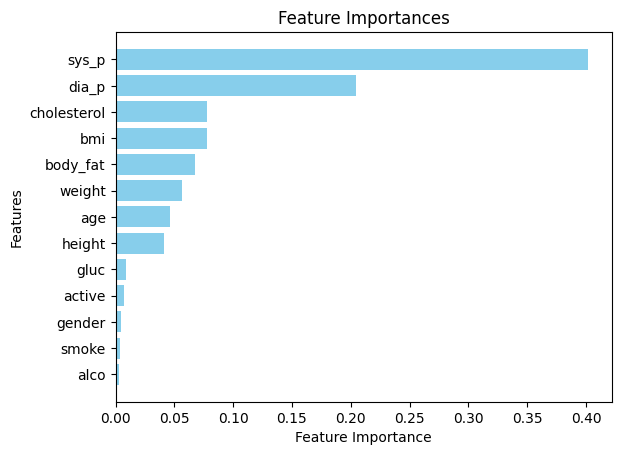

In [72]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

sorted_imp_df = imp_df.sort_values(by="Imp", ascending=False)
print(sorted_imp_df)
plt.barh(sorted_imp_df["Varname"], sorted_imp_df["Imp"], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


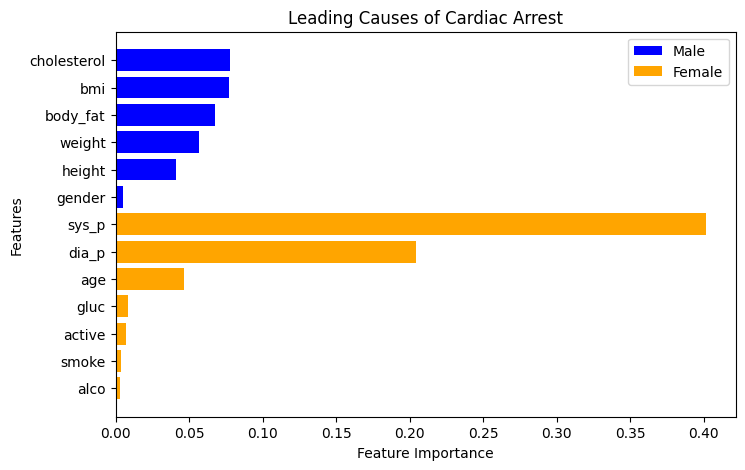

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dt_best is your trained decision tree model
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp":rf_best.feature_importances_
})

# Reset the index of X_train to avoid indexing errors
X_train_reset_index = X_train.reset_index(drop=True)

# Filter the DataFrame to include only males (gender = 2)
imp_df_male = imp_df[X_train_reset_index['gender'] == 2]

# Filter the DataFrame to include only females (gender = 1)
imp_df_female = imp_df[X_train_reset_index['gender'] == 1]

sorted_imp_df_male = imp_df_male.sort_values(by="Imp", ascending=False)
sorted_imp_df_female = imp_df_female.sort_values(by="Imp", ascending=False)

plt.figure(figsize=(8, 5))

# Plot male bar in yellow color
plt.barh(sorted_imp_df_male["Varname"], sorted_imp_df_male["Imp"], color='blue', label='Male')

# Plot female bar in purple color
plt.barh(sorted_imp_df_female["Varname"], sorted_imp_df_female["Imp"], color='orange', label='Female')

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Leading Causes of Cardiac Arrest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.legend()  # Show legend for gender colors
plt.show()

# MODEL 4: ARTIFICIAL NEURAL NETWORK

In [75]:
from sklearn.preprocessing import Normalizer


In [76]:
normalizer = Normalizer()

# Fit and transform the training data
X_train_normalized = normalizer.fit_transform(X_train)

# Transform the test data using the normalization parameters from the training data
X_test_normalized = normalizer.transform(X_test)

In [77]:
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

In [78]:
X_normalized

array([[ 0.45663332,  0.47325468,  0.12790416, ...,  0.17648841,
        -0.30201683, -0.46266494],
       [ 0.20991796,  0.39549927,  0.14410736, ...,  0.14749149,
         0.09295395, -0.13408705],
       [ 0.18104972, -0.20126221, -0.29300415, ..., -0.53968577,
        -0.17156947, -0.00259896],
       ...,
       [ 0.19794613, -0.12104382, -0.17621958, ..., -0.3245797 ,
         0.39894848,  0.39568922],
       [ 0.42658136,  0.44210883,  0.61873289, ...,  0.16487335,
        -0.16151996, -0.33868659],
       [-0.59680374, -0.35617942,  0.16315121, ...,  0.225124  ,
        -0.10828354,  0.06555145]])

In [79]:
# normalized_df = pd.DataFrame(data=X_normalized)
normalized_df = pd.DataFrame(X_normalized, columns=X_train.columns)

# Display the first few rows of the normalized DataFrame
print(normalized_df.head())

        age    gender    height    weight     sys_p     dia_p  cholesterol  \
0  0.456633  0.473255  0.127904 -0.279174 -0.267503  0.017397    -0.161597   
1  0.209918  0.395499  0.144107  0.184163  0.504417  0.629817    -0.135047   
2  0.181050 -0.201262 -0.293004 -0.309238 -0.349774 -0.518125    -0.116475   
3  0.321841 -0.357772 -0.406733 -0.069675 -0.342745 -0.449375    -0.207050   
4 -0.374463  0.378772 -0.004562 -0.263419 -0.039802  0.013924    -0.129335   

       gluc     smoke      alco    active       bmi  body_fat  
0 -0.121810 -0.123960 -0.092843  0.176488 -0.302017 -0.462665  
1 -0.101797 -0.103593 -0.077589  0.147491  0.092954 -0.134087  
2 -0.087797 -0.089347 -0.066919 -0.539686 -0.171569 -0.002599  
3 -0.156072 -0.158826 -0.118958  0.226130  0.121352  0.325965  
4 -0.097491 -0.099212 -0.074308 -0.599273 -0.238217 -0.433183  


In [80]:
print(normalized_df.describe())

                age        gender        height        weight         sys_p  \
count  23712.000000  23712.000000  23712.000000  23712.000000  23712.000000   
mean       0.004872     -0.033508     -0.005789     -0.032811     -0.017967   
std        0.343046      0.344712      0.294446      0.276938      0.269557   
min       -0.922444     -0.626323     -0.835297     -0.667006     -0.982776   
25%       -0.269157     -0.298271     -0.219785     -0.240296     -0.171831   
50%        0.040605     -0.199816     -0.005743     -0.055726     -0.050267   
75%        0.278496      0.321970      0.201164      0.163087      0.134869   
max        0.708173      0.764374      0.874217      0.763920      0.869970   

              dia_p   cholesterol          gluc         smoke          alco  \
count  23712.000000  23712.000000  23712.000000  23712.000000  23712.000000   
mean      -0.012992     -0.044574     -0.042044     -0.044997     -0.041662   
std        0.279875      0.259691      0.228688    

In [81]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [82]:
import tensorflow as tf

In [83]:
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed

In [84]:
lyrs=[13]
act='linear'
opt='Adam'
dr=0.0
# set random seed for reproducibility
seed(42)
tf.random.set_seed(42)
model = Sequential()
# create first hidden layer
print(X_train_normalized.shape)
model.add(Dense(lyrs[0], input_dim=X_train_normalized.shape[1], activation='sigmoid'))
# create additional hidden layers
for i in range(1,len(lyrs)):
    model.add(Dense(lyrs[i], activation='sigmoid'))
# add dropout, default is none
model.add(Dropout(dr))
# create output layer
model.add(Dense(1, activation='sigmoid'))  # output layer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# model = create_model()
# print(model.summary())

(16598, 13)


In [85]:
history = model.fit(X_train_normalized, y_train,validation_data=[X_train_normalized, y_train], batch_size = 64, epochs = 150, verbose = 1)

Epoch 1/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6283 - loss: 0.6617 - val_accuracy: 0.6333 - val_loss: 0.6552
Epoch 2/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6283 - loss: 0.6576 - val_accuracy: 0.6333 - val_loss: 0.6535
Epoch 3/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6283 - loss: 0.6559 - val_accuracy: 0.6333 - val_loss: 0.6518
Epoch 4/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6283 - loss: 0.6542 - val_accuracy: 0.6333 - val_loss: 0.6500
Epoch 5/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6283 - loss: 0.6523 - val_accuracy: 0.6333 - val_loss: 0.6482
Epoch 6/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6283 - loss: 0.6504 - val_accuracy: 0.6333 - val_loss: 0.6461
Epoch 7/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6283 - loss: 0.6483 - val_accuracy: 0.6333 - val_loss: 0.6440
Epoch 8/150
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6283 - loss: 0.6461 - val_accu

In [86]:
loss, ann_test_accuracy = model.evaluate(X_test_normalized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", ann_test_accuracy)

223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.5194
Test Loss: 0.5120972394943237
Test Accuracy: 0.7901321053504944


223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[4178  358]
 [1135 1443]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4536
           1       0.80      0.56      0.66      2578

    accuracy                           0.79      7114
   macro avg       0.79      0.74      0.75      7114
weighted avg       0.79      0.79      0.78      7114

ROC AUC Score: 0.8025165113023919


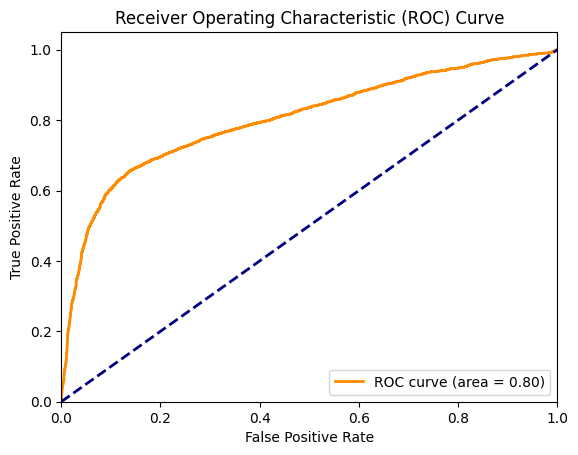

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming model.predict returns probabilities for each class
y_pred_prob = model.predict(X_test_normalized)

# Assuming you're interested in binary classification
# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [88]:
train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train)
print("Train Loss:", train_loss)
print("Accuracy on train data:", train_accuracy)

519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7785 - loss: 0.5219
Train Loss: 0.5193890333175659
Accuracy on train data: 0.7799132466316223


# EVALUATION AND RESULT


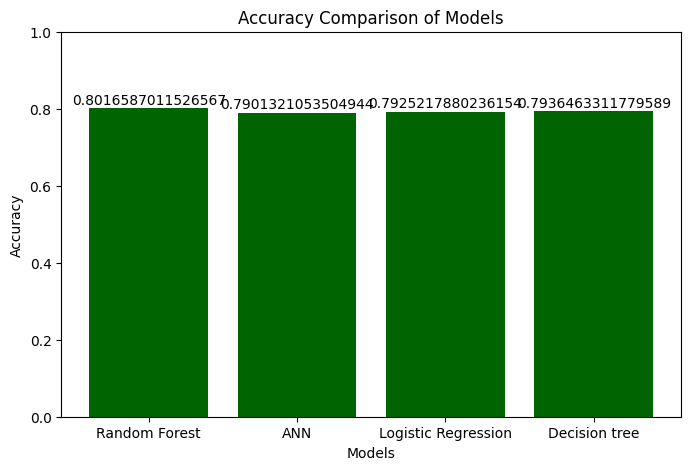

Random Forest: Accuracy = 0.8016587011526567
ANN: Accuracy = 0.7901321053504944
Logistic Regression: Accuracy = 0.7925217880236154
Decision tree: Accuracy = 0.7936463311779589


In [100]:
model_names = ['Random Forest', 'ANN', 'Logistic Regression','Decision tree' ]

# List to store accuracy scores of all models
accuracy_scores = [rf_test_accuracy, ann_test_accuracy,  log_test_accuracy, dt_test_accuracy]

# Create a plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color='darkgreen')

# Add title and labels
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add text annotations for accuracy scores
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score}', ha='center')

# Show the plot
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.show()

# Display a summary of accuracy scores
for model, score in zip(model_names, accuracy_scores):
    print(f'{model}: Accuracy = {score}')

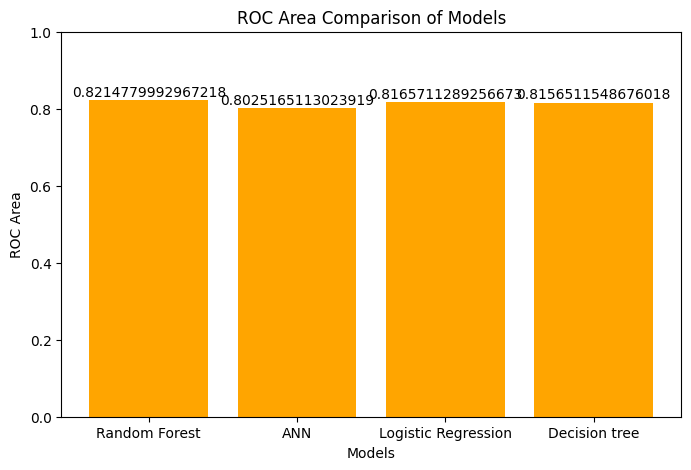

Random Forest: ROC = 0.8214779992967218
ANN: ROC = 0.8025165113023919
Logistic Regression: ROC = 0.8165711289256673
Decision tree: ROC = 0.8156511548676018


In [98]:
model_names = ['Random Forest', 'ANN', 'Logistic Regression','Decision tree' ]

# List to store ROC scores of all models
roc_scores = [auc, roc_auc,  auc_lr, auc_dt]

# Create a plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, roc_scores, color='orange')

# Add title and labels
plt.title('ROC Area Comparison of Models')
plt.xlabel('Models')
plt.ylabel('ROC Area')


for i, score in enumerate(roc_scores):
    plt.text(i, score + 0.01, f'{score}', ha='center')

# Show the plot
plt.ylim(0, 1)  
plt.show()


for model, score in zip(model_names, roc_scores):
    print(f'{model}: ROC = {score}')

# GUI APPLICATION

In [91]:

rf = rf_best
#rf.fit(X,y)

In [92]:
import joblib

In [93]:
joblib.dump(rf,'model_predict_SCD')

['model_predict_SCD']

In [94]:
model = joblib.load('model_predict_SCD')

In [95]:
from tkinter import *
import joblib
from tkinter import Tk
import tkinter

In [99]:
import tkinter as tk
from tkinter import messagebox

# Function to perform prediction
def predict():
    data = [int(Age.get()),
        int(Gender.get()),
        int(Height.get()),
        int(Weight.get()),
        int(Systolic_BP.get()),
        int(Diastolic_BP.get()),
        int(Cholesterol.get()),
        int(Glucose.get()),
        int(Smoke.get()),
        int(Alcohol.get()),
        int(Active.get()),
        float(BMI.get()),
        float(Bodyfat.get())
    ]
    prediction = rf.predict([data])
    
    
    if prediction == 1:
        messagebox.showinfo("Prediction", "Possible risk of Cardiac arrest")
    else:
        messagebox.showinfo("Prediction", "Healthy")

# Create main application window
root = tk.Tk()
root.title("Cardiac Risk Prediction")
# Define variables for user input
Age = tk.StringVar()
Gender = tk.StringVar()
Height = tk.StringVar()
Weight = tk.StringVar()
Systolic_BP = tk.StringVar()
Diastolic_BP = tk.StringVar()
Cholesterol = tk.StringVar()
Glucose = tk.StringVar()
Smoke = tk.StringVar()
Alcohol = tk.StringVar()
Active = tk.StringVar()
BMI = tk.StringVar()
Bodyfat = tk.StringVar()
# Create input fields and labels
tk.Label(root, text="Enter Your Age").grid(row=0, column=0)
tk.Entry(root, textvariable=Age).grid(row=0, column=1)
tk.Label(root, text="Enter your Gender. Female(1)/Male(2)").grid(row=1, column=0)
tk.Entry(root, textvariable=Gender).grid(row=1, column=1)
tk.Label(root, text="Enter Your Height(in cms)").grid(row=2, column=0)
tk.Entry(root, textvariable=Height).grid(row=2, column=1)
tk.Label(root, text="Enter Your Weight(in kg)").grid(row=3, column=0)
tk.Entry(root, textvariable=Weight).grid(row=3, column=1)
tk.Label(root, text="Enter Value of Systolic BP").grid(row=4, column=0)
tk.Entry(root, textvariable=Systolic_BP).grid(row=4, column=1)
tk.Label(root, text="Enter Value of Diastolic BP").grid(row=5, column=0)
tk.Entry(root, textvariable=Diastolic_BP).grid(row=5, column=1)
tk.Label(root, text="Enter Value of Cholesterol.(1 - <200, 2 - 200< or <239, 3 - >239)").grid(row=6, column=0)
tk.Entry(root, textvariable=Cholesterol).grid(row=6, column=1)
tk.Label(root, text="Enter Value of Glucose.(1 - <100, 2 - 100< or <125, 3 - >125").grid(row=7, column=0)
tk.Entry(root, textvariable=Glucose).grid(row=7, column=1)
tk.Label(root, text="Enter Value of Smoking_History. (0 - If you don't smoke. 1- If you smoke)").grid(row=8, column=0)
tk.Entry(root, textvariable=Smoke).grid(row=8, column=1)
tk.Label(root, text="Enter Value of Alcohol_History(0 - If you don't consume alcohol, 1 - If you consume alcohol").grid(row=9, column=0)
tk.Entry(root, textvariable=Alcohol).grid(row=9, column=1)
tk.Label(root, text="Enter Value of Active(0 - If you are not physically active, 1 - If you are physically active").grid(row=10, column=0)
tk.Entry(root, textvariable=Active).grid(row=10, column=1)
tk.Label(root, text="Enter Your BMI (Upto 3 decimals)").grid(row=11, column=0)
tk.Entry(root, textvariable=BMI).grid(row=11, column=1)
tk.Label(root, text="Enter Your Bodyfat(Upto 3 decimals)").grid(row=12, column=0)
tk.Entry(root, textvariable=Bodyfat).grid(row=12, column=1)
# Create button to trigger prediction
tk.Button(root, text="Predict", command=predict).grid(row=13, columnspan=2)
# Start the GUI application
root.mainloop()